In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

D:\Anaconda Installation\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda Installation\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda Installation\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda Installation\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
train=pd.read_csv("C:/Users/ricar/OneDrive/Documents/5th Year - HonoursMasters/COS 711/Assignment 3/Train.csv")
test=pd.read_csv("C:/Users/ricar/OneDrive/Documents/5th Year - HonoursMasters/COS 711/Assignment 3/Test.csv")

# split train dataset into train \ test : 75% \ 25%
train = train[:11654:]
test = train[:3885]

train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [5]:
def replace_data(ts):
    ts = ts.replace("nan","-10**3").split(",") # NANs replaced with value differnt from all input values
    replaced_ts = np.array([float(t) for t in ts])
    return replaced_ts

def extract_time_series(df, feat_name):
    return np.array(df[feat_name].apply(lambda ts: replace_data(ts)).tolist())

import matplotlib.pyplot as plt
for i in range(len(train)):
    if train['location'][i] == 'A':
        train['location'][i] = 0
    elif train['location'][i] == 'B':
        train['location'][i] = 1
    elif train['location'][i] == 'C':
        train['location'][i] = 2
    elif train['location'][i] == 'D':
        train['location'][i] = 3
    elif train['location'][i] == 'E':
        train['location'][i] = 4
        
feat_name_arr = ['temp', 'precip', 'rel_humidity', 'wind_dir', 'wind_spd', 'atmos_press']

# Transform training data
train_time_series_feat = np.array([extract_time_series(train, feat_name) for feat_name in feat_name_arr]).transpose(1,2,0)
print('Shape of training data:', train_time_series_feat.shape)

# Transform test data
test_time_series_feat = np.array([extract_time_series(test, feat_name) for feat_name in feat_name_arr]).transpose(1,2,0)
print('Shape of test data:', test_time_series_feat.shape)

Shape of training data: (11654, 121, 6)
Shape of test data: (3885, 121, 6)


In [6]:
print('Dataset keys:', train.keys())

Dataset keys: Index(['ID', 'location', 'temp', 'precip', 'rel_humidity', 'wind_dir',
       'wind_spd', 'atmos_press', 'target'],
      dtype='object')


#### Data Visualization

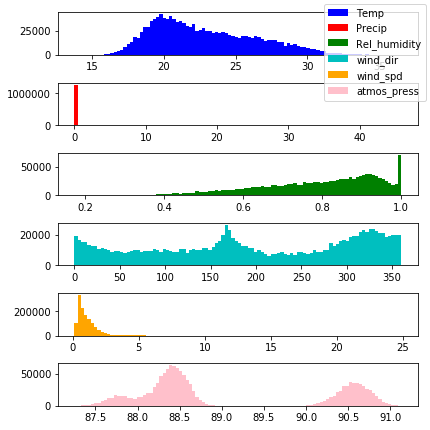

In [7]:
rng = np.arange(100)

fig, axs = plt.subplots(6, 1, figsize=(6,6))

valid_idx = np.where(train_time_series_feat[:,:,0] != -100)
axs[0].hist(train_time_series_feat[:,:,0][valid_idx].flatten(), color = 'b', bins=100, label = 'Temp')
valid_idx = np.where(train_time_series_feat[:,:,1] != -100)
axs[1].hist(train_time_series_feat[:,:,1][valid_idx].flatten(), color = 'r', bins=100, label = 'Precip')
valid_idx = np.where(train_time_series_feat[:,:,2] != -100)
axs[2].hist(train_time_series_feat[:,:,2][valid_idx].flatten(), color = 'g', bins=100, label = 'Rel_humidity')
valid_idx = np.where(train_time_series_feat[:,:,3] != -100)
axs[3].hist(train_time_series_feat[:,:,3][valid_idx].flatten(), color = 'c', bins=100, label = 'wind_dir')
valid_idx = np.where(train_time_series_feat[:,:,4] != -100)
axs[4].hist(train_time_series_feat[:,:,4][valid_idx].flatten(), color = 'orange', bins=100, label = 'wind_spd')
valid_idx = np.where(train_time_series_feat[:,:,5] != -100)
axs[5].hist(train_time_series_feat[:,:,5][valid_idx].flatten(), color = 'pink', bins=100, label = 'atmos_press')

#fig.suptitle('Histograms of 6 Weather Factors')
fig.legend()
plt.tight_layout()
print()

(Text(0.5, 0, 'PM2.5'), Text(0, 0.5, 'No. of samples'))

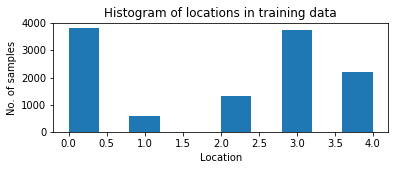

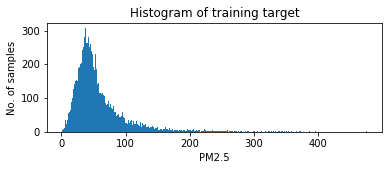

In [8]:
import matplotlib.pyplot as plt
# Location plot
for i in range(len(train)):
    if train['location'][i] == 'A':
        train['location'][i] = 0
    elif train['location'][i] == 'B':
        train['location'][i] = 1
    elif train['location'][i] == 'C':
        train['location'][i] = 2
    elif train['location'][i] == 'D':
        train['location'][i] = 3
    elif train['location'][i] == 'E':
        train['location'][i] = 4

plt.figure(1, figsize = (6,2))
plt.hist(train['location'])
plt.title('Histogram of locations in training data')
plt.xlabel('Location'), plt.ylabel('No. of samples')

# target plot
train_target = train['target'].values.astype(np.float32)

plt.figure(2,figsize = (6,2))
plt.hist(train_target,bins=400)
plt.title('Histogram of training target')
plt.xlabel('PM2.5'), plt.ylabel('No. of samples')

#### Normalization

In [9]:
time_series_feat = np.concatenate([train_time_series_feat, test_time_series_feat], axis = 0)

# data standardization
for c in range(time_series_feat.shape[2]):
    valid_idx = np.where(time_series_feat[:,:,c] != -10**3) # doesn't include missing values
    mean = time_series_feat[:,:,c][valid_idx].mean()
    std = time_series_feat[:,:,c][valid_idx].std()
    
    time_series_feat[:,:,c][valid_idx] -= mean
    time_series_feat[:,:,c][valid_idx] /= std

train_time_series_feat = time_series_feat[:train['location'].shape[0]]
test_time_series_feat = time_series_feat[train['location'].shape[0]:]

print('shape of train', np.shape(train_time_series_feat))

shape of train (11654, 121, 6)


In [10]:
train_X = train_time_series_feat.reshape(-1,121,6,1)
test_X = test_time_series_feat.reshape(-1,121,6,1)
train_X.shape, test_X.shape

((11654, 121, 6, 1), (3885, 121, 6, 1))

#### Splitting Train set into train and validation

In [11]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train['target'], test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((9323, 121, 6, 1), (2331, 121, 6, 1), (9323,), (2331,))

### CNN Model

In [13]:
batch_size = 32
epochs = 50
num_classes = 1

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(4, 4), activation='relu',input_shape=(121,6,1),padding='same'))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))               
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Flatten())
fashion_model.add(Dense(64, activation='relu'))
fashion_model.add(Dropout(0.5))              
fashion_model.add(Dense(num_classes, activation='relu'))

In [14]:
fashion_model.compile(loss='mse', 
                      optimizer= keras.optimizers.Adam())
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 121, 6, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 3, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 3, 64)         18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 2, 64)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 2, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 2, 64)         36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 1, 64)        

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [268]:
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']

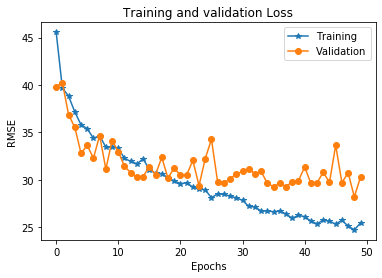

In [269]:
mse_loss = np.sqrt(loss)
mse_val_loss = np.sqrt(val_loss)
plt.figure(1)
plt.plot(np.arange(epochs), mse_loss, '*-', label = 'Training')
plt.plot(np.arange(epochs), mse_val_loss, 'o-', label = 'Validation')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

### Model Evaluation on Test Set

In [270]:
test_eval = fashion_model.evaluate(test_X, test['target'], verbose=1)

3885/3885 [==============================] - 0s 82us/step


In [271]:
print('RMSE of Test',np.sqrt(test_eval))

RMSE of Test 22.259901817852565


### Prediction

In [272]:
y_pred = fashion_model.predict(test_X)

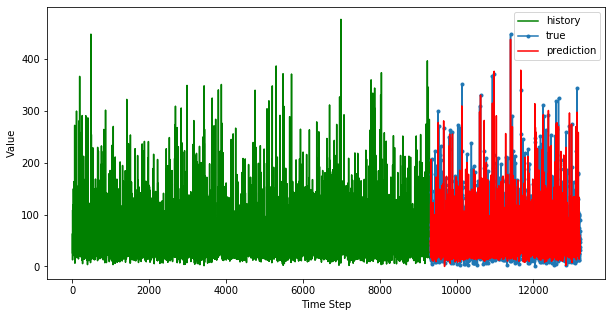

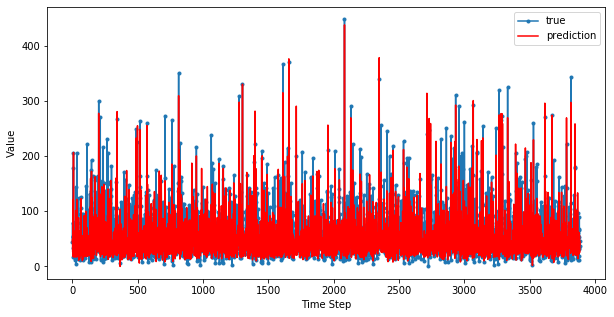

In [275]:
plt.figure(1, figsize = (10,5))
plt.plot(np.arange(0, len(train_label)),train_label, 'g', label="history")
plt.plot(np.arange(len(train_label), len(train_label) + len(test['target'])), test['target'], marker='.', label="true")
plt.plot(np.arange(len(train_label), len(train_label) + len(test['target'])), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

plt.figure(2, figsize = (10,5))
plt.plot(test['target'], marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()